## Importación de librerías

In [ ]:
import math
import cmath
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sympy import li
from scipy.fft import fft, fftfreq, fftshift


## Datos de entrada

In [ ]:
SF = "7"#@param [7,8,9,10,11,12]
Ancho_de_banda = 1000#@param {type : "number"}
Frecuencia_muestreo = 1000#@param {type : "number"}
Simbolo_representado = 40#@param {type : "number"}
SignalNoiseRadio =  -10 #@param {type : "number"}
numero_ciclos =  500 #@param {type : "number"}

SF = int(SF)
wb = Ancho_de_banda
fs = Frecuencia_muestreo
s = Simbolo_representado
SNR = SignalNoiseRadio

## Generación del símbolo 

In [ ]:
var1 = 2**SF
num_samples = int((var1)*(fs/wb))
k = s
simbolo_real = np.linspace(1, num_samples,num_samples)
simbolo_real = np.asarray(simbolo_real, dtype=int)
simbolo_lora = np.zeros(num_samples, dtype=complex)
i = 0
for i in range (0, num_samples): 
  if (k>= var1):
    k = k-var1
  k = k+1
  simb = (complex(1/(math.sqrt(var1)))*cmath.exp(1j*2*math.pi*k*(k/(2*var1))))
  simbolo_lora[i] = simb
  


## Comparación de datos, localización de signo y obtención del error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


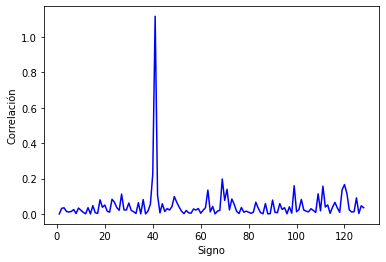

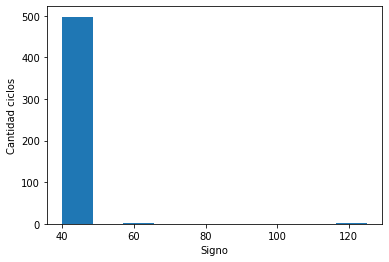

Error: 0.004


In [ ]:
aciertos =np.zeros(numero_ciclos)
for i in range(0, numero_ciclos): 

  # añadir ruido

  # calculo de potencia de la señal y conversion a decibelios
  prom_watts = np.mean(simbolo_lora)
  prom_db = 10 * np.log10(prom_watts)
  # Calculo de ruido en watts
  prom_ruido_db = prom_db + SNR
  noise_avg_watts = 10 ** (prom_ruido_db / 10)
  # Generate an sample of white noise
  mean_noise = 0

  noise = np.random.normal(0, 400*noise_avg_watts, len(simbolo_lora))
  #noise = np.random.multivariate_normal([0,0], [[noise_avg_watts.real/10, 0],[0,noise_avg_watts.imag/10]] , size=len(simbolo_lora)).view(np.complex128)                                                                                
  # Noise up the original signal
  simb_ruidoso = simbolo_lora + noise

  # generando Base Down Chirp 
  base_down_chirp = np.zeros(num_samples, dtype=complex)
  k = 0
  for j in range (0, num_samples): 
    if (k>= var1):
      k = k-var1
    k = k+1
    simb = (complex(1/(math.sqrt(var1)))*cmath.exp(-1j*2*math.pi*k*(k/(2*var1))))
    base_down_chirp[j] = simb

  dechirped = simb_ruidoso*base_down_chirp #dechirping the signal
  #Fast fourier Transform
  correlation = abs(fft(dechirped))**2

  # encontrando el valor máximo
  aciertos[i] = correlation.argmax()

# plot the complex numbers
plt.plot(simbolo_real, correlation,'-b')
plt.ylabel('Correlación')
plt.xlabel('Signo')
plt.show()

plt.hist(aciertos)
plt.ylabel('Cantidad ciclos')
plt.xlabel('Signo')
plt.show()

error = sum(aciertos!=Simbolo_representado)/numero_ciclos
print("Error: " + str(error))